In [4]:
import numpy as np
import pandas as pd
import csv
import ast
import matplotlib.pyplot as plt

data_path = 'data/'
num_runs = 6 # number of experiments
num_robots = 1

## Function to help with reading in the trajectory data
def string_to_numpy_array(s):
    # Remove whitespace and convert to a list of tuples
    tuple_list = ast.literal_eval(s.replace(' ', ''))
    # Convert the list of tuples to a numpy array
    return np.array(tuple_list, dtype=object)

# Loop over all experimental runs
all_trajectories = []
for i in range(1, num_runs + 1):
    # Import trajectories data
    traj_data = pd.read_csv(data_path + "0degrees_reflection{}.csv".format(i))
    
    # Extract the first row for each unique timestamp - note that this restricts data to once per second
    traj_unique = traj_data.groupby('time').first().reset_index()
    
    # Extract the t values and centers data
    t_vals = traj_unique['time'].values
    centers_data = traj_unique['centers'].values
    
    # Create list of all disk trajectories, which are lists of (x,y) tuples
    trajectories = []
    for t in range(len(t_vals)):
        # Parse the centers string once per timestep
        parsed_centers = string_to_numpy_array(centers_data[t])
        
        positions_at_t = []
        for robot_id in range(num_robots):
            # Handle both single robot and multiple robot cases
            if parsed_centers.ndim == 1:
                # Single robot case: parsed_centers is [x, y]
                x_pos = parsed_centers[0]
                y_pos = parsed_centers[1]
            else:
                # Multiple robots case: parsed_centers is [[x1,y1], [x2,y2], ...]
                x_pos = parsed_centers[robot_id][0]
                y_pos = parsed_centers[robot_id][1]
            
            tuple_pair = (x_pos, y_pos)
            positions_at_t.append(tuple_pair)
        
        trajectories.append(positions_at_t)
    
    all_trajectories.append(trajectories)

# Now you can easily access trajectory data:
# all_trajectories[run_index][time_index][robot_index] = (x, y)

# Code to plot the trajectories of a single or each run

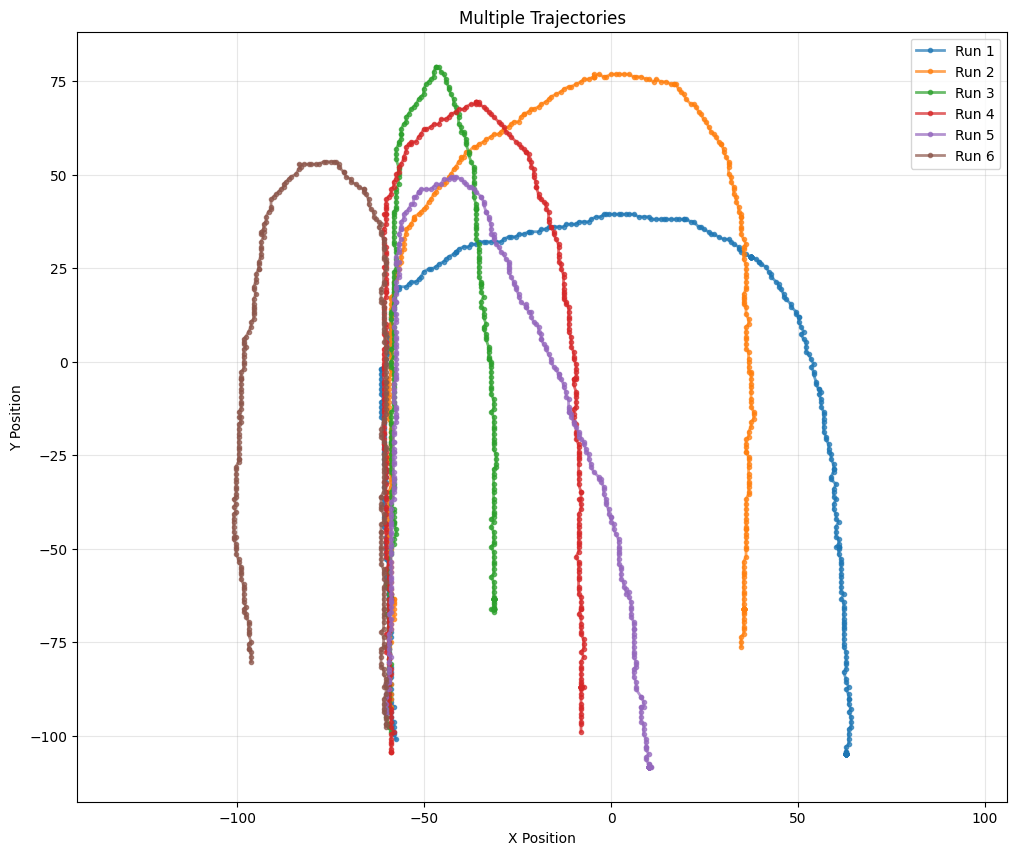

In [5]:
def plot_trajectory(run_index, robot_index=0):
    """Plot trajectory for a specific run and robot."""
    trajectory = all_trajectories[run_index]
    
    # Extract x and y coordinates
    x_coords = [pos[robot_index][0] for pos in trajectory]
    y_coords = [pos[robot_index][1] for pos in trajectory]
    
    plt.figure(figsize=(10, 8))
    plt.plot(x_coords, y_coords, 'o-', linewidth=2, markersize=4)
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title(f'Trajectory - Run {run_index + 1}, Robot {robot_index}')
    plt.grid(True, alpha=0.3)
    plt.axis('equal')
    plt.show()

def plot_multiple_runs(run_indices, robot_index=0):
    """Plot trajectories for multiple runs."""
    plt.figure(figsize=(12, 10))
    
    for run_idx in run_indices:
        trajectory = all_trajectories[run_idx]
        x_coords = [pos[robot_index][0] for pos in trajectory]
        y_coords = [pos[robot_index][1] for pos in trajectory]
        
        plt.plot(x_coords, y_coords, 'o-', linewidth=2, markersize=3, 
                alpha=0.7, label=f'Run {run_idx + 1}')
    
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title('Multiple Trajectories')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.axis('equal')
    plt.show()

# Usage examples:
#plot_trajectory(3)  # Plot one run (index 0)
plot_multiple_runs([0, 1, 2, 3, 4, 5])  # Plot first three runs

Export data of run 5 to csv to bw further analysed.

In [ ]:
# Save the results in a new csv file
with open(f"data_run5.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["x-value", "y-value"])
    for measurement in measurements:
        writer.writerow(measurement)

NameError: name 'measurements' is not defined